## Required Assignment 5.1: Will the Customer Accept cupon, particularly the Coffee House Cupon.


**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not, particularly the Coffee House Cupons.

***The problem is to identify factors influencing acceptance of Coffee House coupons, distinguishing between acceptors and non-acceptors using visualizations and statistical analysis.***

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

## Import Libraries and Load data

In [1]:
#import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Load Cupon Data
data = pd.read_csv('data/coupons.csv')

## Explore Features and complete feature engineering

1. Understand various features, their values
2. Understand categorical column values
3. Find Nan/Null value count and handle them
4. Drop features with too many nulls 
5. Understand the distribution of the cupon data, are they properly distributed or do we need to apply any techniques to address improper distribution of the data for the target variable "Y/coupon_accepted" ?



In [3]:
#Explore cupon data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
#Explore the tail of cupon data
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [5]:
#Explore Cupon data information
data.info()

#Explore statistical summary of cupon data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
##Explore dataset for the missing and problematic values

print(data.isna().sum())

#find the numbers of rows and features in the dataset
print(data.shape)



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
(12684, 26)


In [7]:
#drop car feature as it has too many null values and does not add much value to the analysis
data = data.drop(columns=['car'])
data = data.rename(columns={'Y': 'coupon_accepted'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

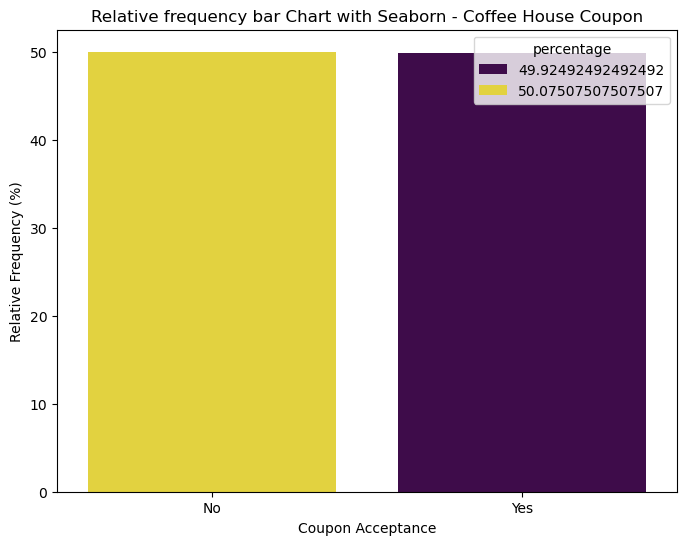

In [8]:
#Understand the distribution of target variable 'Y' for restaurant coupon using seaborn
df_coffee_coupon = data[data['coupon'] == 'Coffee House']
percentages_df = df_coffee_coupon['coupon_accepted'].value_counts(normalize=True).rename('percentage').reset_index()
percentages_df['percentage'] = percentages_df['percentage'] * 100


# Map 0/1 -> "No"/"Yes" for better readability in the plot
label_map = {0: 'No', 1: 'Yes'}
percentages_df['X_label'] = percentages_df['coupon_accepted'].map(label_map)

#plot bar chart using seaborn
plt.figure(figsize=(8, 6))
# sns.barplot(x= 'X_label', y='percentage', data=percentages_df, palette='viridis', hue='X_label', dodge=False)
sns.barplot(x= 'X_label', y='percentage', data=percentages_df, palette='viridis',hue='percentage', dodge=False)

plt.xlabel('Coupon Acceptance')
plt.ylabel('Relative Frequency (%)')
plt.title('Relative frequency bar Chart with Seaborn - Coffee House Coupon')

plt.savefig('images/coffee_acceptance_distribution.png')
plt.show()


In [9]:
#find the unique values in the age column - Commented out to supress output
#print(data['age'].unique())

# create a new numerical column for the age column
map_age = {
	'21': 21,
	'46': 46,
	'26': 26,
	'31': 31,
	'50plus': 51,
	'41': 41,
	'36': 36,
	'below21': 20
}

data['age_num'] = data["age"].map(map_age)



#find the unique values in the income column - - Commented out to supress output
#print(data['income'].unique())

#Create a mapping for income ranges to numerical values
map_income = {
	'Less than $12500': 12499,
	'$12500 - $24999': 25000,
	'$25000 - $37499': 37500,
	'$37500 - $49999': 50000,
	'$50000 - $62499': 62500,
	'$62500 - $74999': 75000,
    '$75000 - $87499': 87500,
	'$87500 - $99999': 100000,
	'$100000 or More': 100001
}

#create a new numerical column for the age column
data['income_num'] = data["income"].map(map_income)

#find the unique values in the time column - - Commented out to supress output
#print(data['Bar'].unique())

# Map bar frequency for numeric comparison
map_bar = {
    'never': 0,
    'less1': 0,
    '1~3': 3,
    '4~8': 4,
    'gt8': 8
}
data['bar_num'] = data['Bar'].map(map_bar)


#find the unique values in the time column - Commented out to supress output
#print(data['time'].unique()) 

map_time = {
	'2PM': 14,
	'10AM': 10, # treat less than 1 as zero visits
	'6PM': 18,
	'7AM': 7,
	'10PM': 22	
}

data['time_num'] = data["time"].map(map_time)


#drop the original categorical columns that have been converted to numerical columns
#data = data.drop(columns=['age', 'income', 'Bar', 'time'])

#Explore Cupon data information after adding numerical columns - Commented out to supress output
#data.info()


## Outlier Detection

1. Identify outliers in the numerical features, box plots to visulize the numerical features. Outliers are data points that fall outside the whiskers (typically 1.5 times the IQR from the quartiles). We'll plot box plots for key numerical columns.

2. A histogram for the age distribution

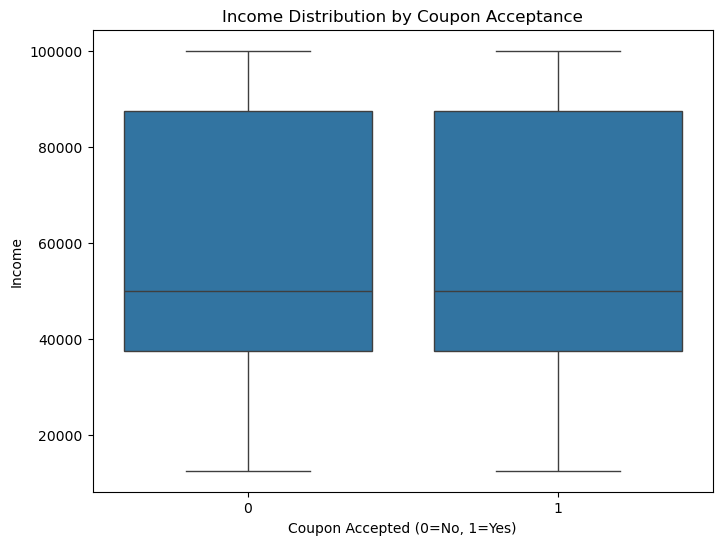

In [10]:
# Box plot for income by coupon acceptance
plt.figure(figsize=(8, 6))
sns.boxplot(x='coupon_accepted', y='income_num', data=data)
plt.xlabel('Coupon Accepted (0=No, 1=Yes)')
plt.ylabel('Income')
plt.title('Income Distribution by Coupon Acceptance')
plt.savefig('images/income_by_acceptance_boxplot.png')
plt.show()

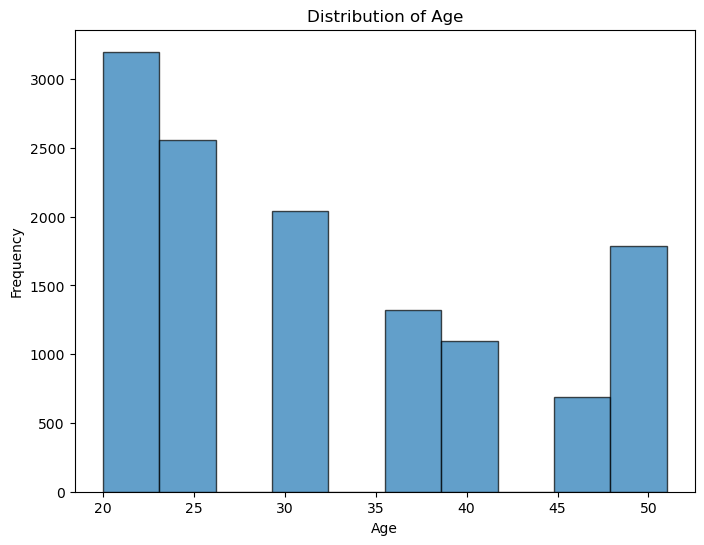

In [11]:
# Histogram for age distribution
plt.figure(figsize=(8, 6))
plt.hist(data['age_num'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.savefig('images/age_distribution_histogram.png')
plt.show()

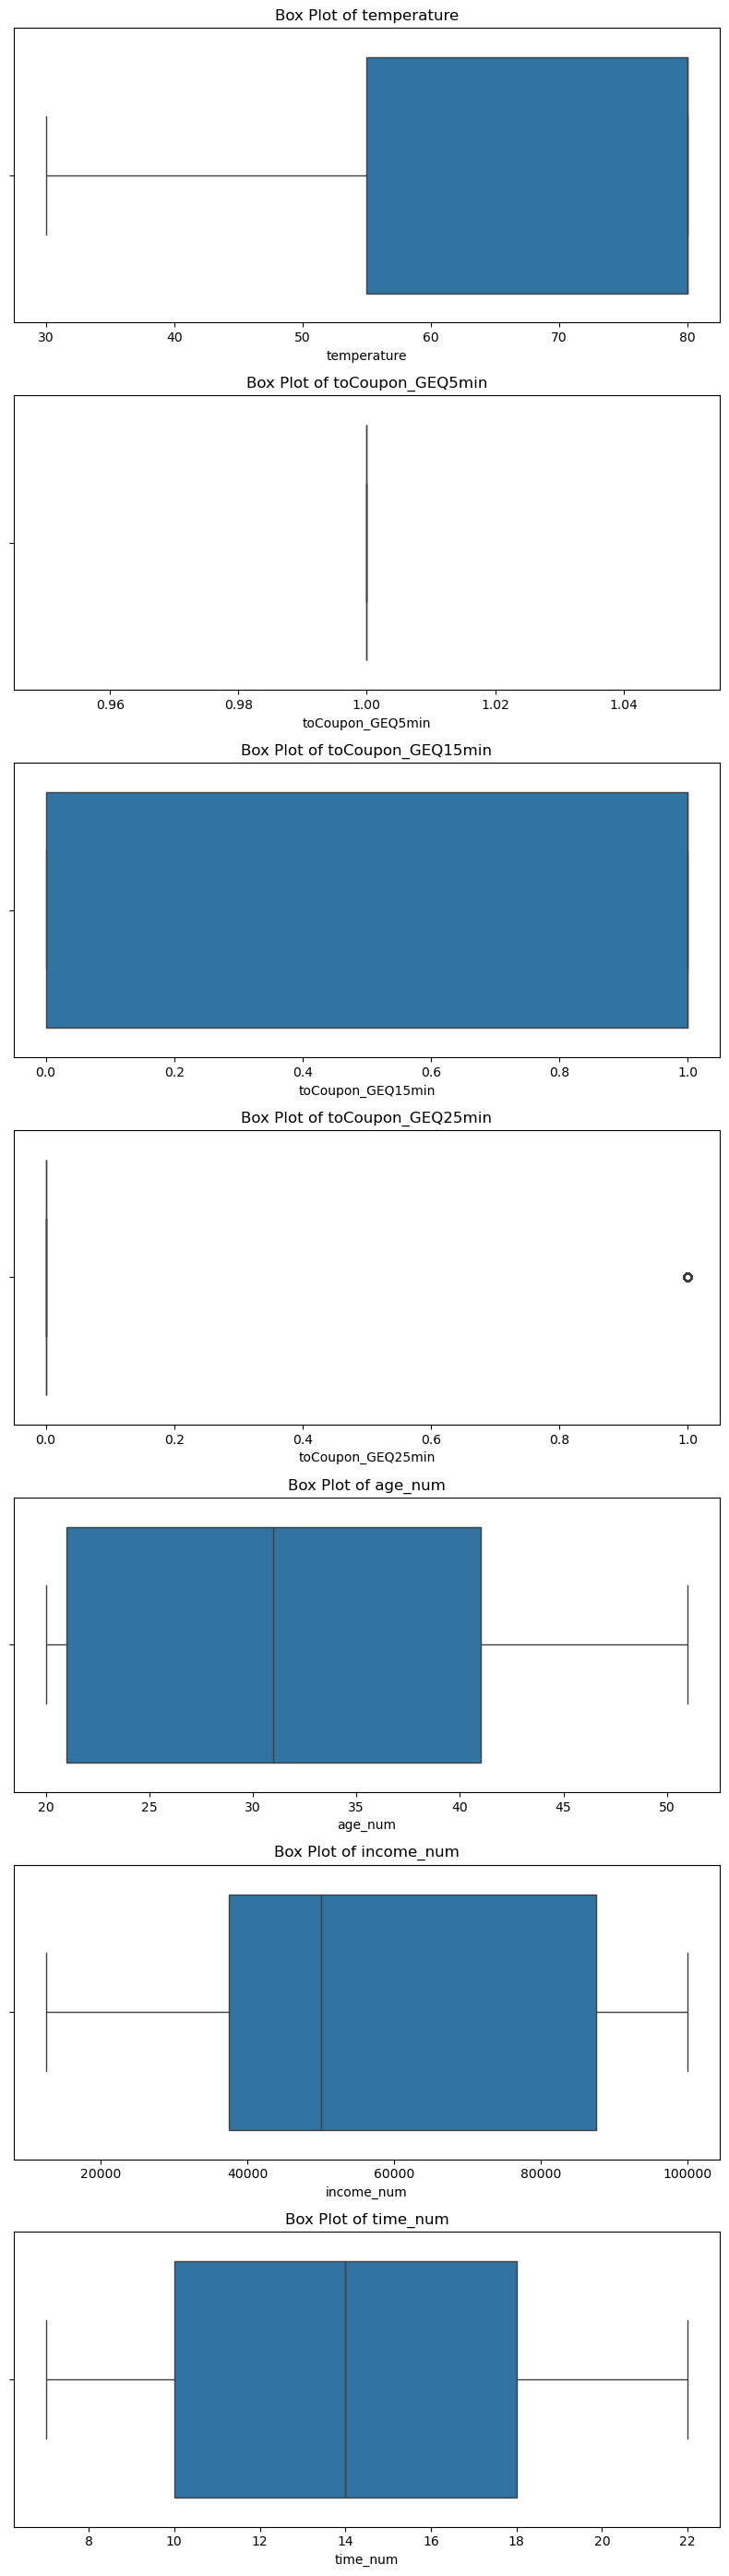

In [12]:
# List of applicabler numerical columns to check for outliers for the Coffee House cupon
numerical_cols = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'age_num', 'income_num', 'time_num']

# Plot box plots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 4 * len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [13]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in each numerical column
for col in numerical_cols:
    outliers, lb, ub = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers found. Bounds: [{lb:.2f}, {ub:.2f}]")
    # if len(outliers) > 0:
    #     print(f"Outlier values: {outliers[col].values}")
    # print()

temperature: 0 outliers found. Bounds: [17.50, 117.50]
toCoupon_GEQ5min: 0 outliers found. Bounds: [1.00, 1.00]
toCoupon_GEQ15min: 0 outliers found. Bounds: [-1.50, 2.50]
toCoupon_GEQ25min: 1511 outliers found. Bounds: [0.00, 0.00]
age_num: 0 outliers found. Bounds: [-9.00, 71.00]
income_num: 0 outliers found. Bounds: [-37500.00, 162500.00]
time_num: 0 outliers found. Bounds: [-2.00, 30.00]


## Analysis - Coffee Cupon Acceptance

In [14]:
# Find acceptace rate among the cupon categories
acceptance_rates = data.groupby('coupon')['coupon_accepted'].sum() / data[data['coupon_accepted'] == 1]['coupon_accepted'].count() * 100
print(acceptance_rates)

coupon
Bar                      11.470180
Carry out & Take away    24.410541
Coffee House             27.669903
Restaurant(20-50)         9.126214
Restaurant(<20)          27.323162
Name: coupon_accepted, dtype: float64


age_num
20     2.702703
21    11.586587
26    10.860861
31     7.432432
36     4.704705
41     4.079079
46     2.827828
51     5.730731
Name: coupon_accepted, dtype: float64


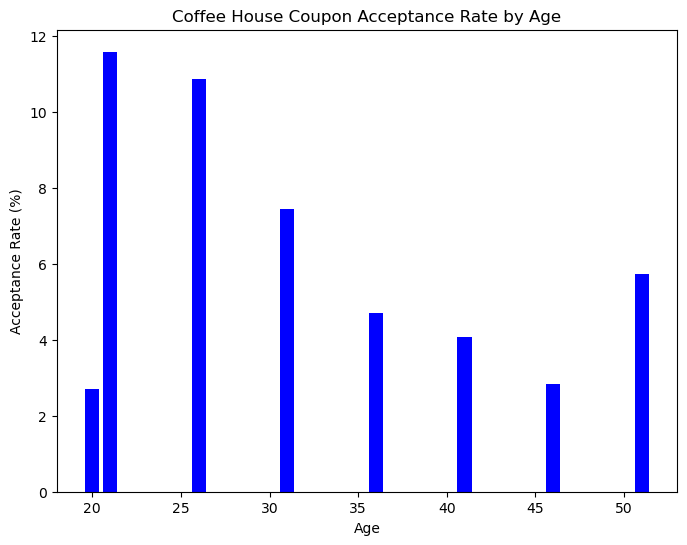

In [15]:
#Find Coffee House Cupon acceptance rate among the age groups

df_coffee_coupon = data[data['coupon'] == 'Coffee House']

age_acceptance_rates = df_coffee_coupon.groupby('age_num')['coupon_accepted'].sum() / df_coffee_coupon['coupon_accepted'].count() * 100
print(age_acceptance_rates)


#show the bar plot for age vs acceptance rate for coffee house cupon
plt.figure(figsize=(8, 6))
plt.bar(age_acceptance_rates.index, age_acceptance_rates.values, color='blue')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate (%)')
plt.title('Coffee House Coupon Acceptance Rate by Age')
plt.show()

income_num
12499     4.254254
25000     8.033033
37500     7.582583
50000     8.008008
62500     6.906907
75000     3.003003
87500     1.751752
100000    3.778779
100001    6.606607
Name: coupon_accepted, dtype: float64


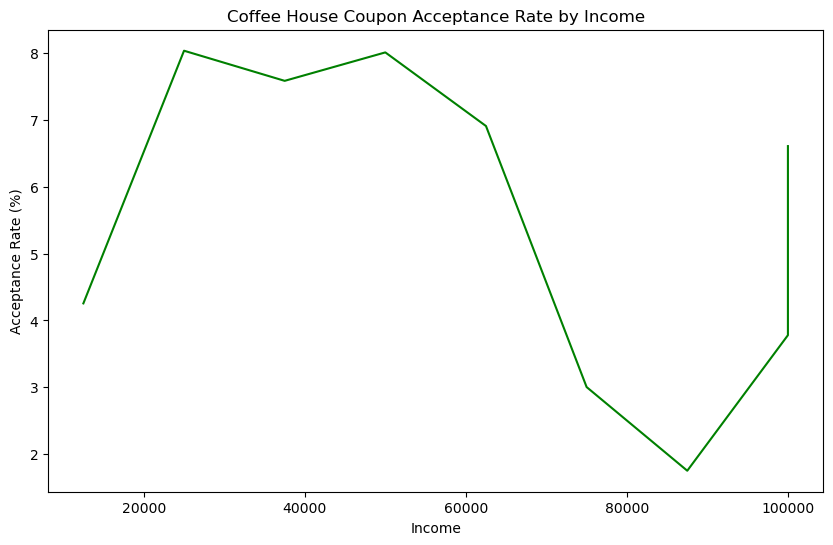

In [16]:

#Find Coffee House cupon acceptance rate among the different income groups
income_acceptance_rates = df_coffee_coupon.groupby('income_num')['coupon_accepted'].sum() / df_coffee_coupon['coupon_accepted'].count() * 100
print(income_acceptance_rates) 

#show line plot for income vs acceptance rate for coffee house cupon if there is any trend in the acceptance rate
plt.figure(figsize=(10, 6))
plt.plot(income_acceptance_rates.index, income_acceptance_rates.values, color='green')
plt.xlabel('Income')
plt.ylabel('Acceptance Rate (%)')
plt.title('Coffee House Coupon Acceptance Rate by Income') 
plt.savefig('images/coffee_income_acceptance_rate_line_plot.png')
plt.show()


In [17]:
#find drivers who accepted the cupon and their driving direction was the same as the cupon direction
accepted_same_direction = df_coffee_coupon[(df_coffee_coupon['coupon_accepted'] == 1) & (df_coffee_coupon['direction_same'] == 1)].groupby('direction_same')['coupon_accepted'].sum() / df_coffee_coupon[(df_coffee_coupon['direction_same'] == 1)]['coupon_accepted'].count() * 100
print(accepted_same_direction)

direction_same
1    53.066667
Name: coupon_accepted, dtype: float64


In [18]:
#find people who accepted the Coffee Cupon who are less than 21 and making less than 25K 

# Filter for Coffee coupon acceptors
acceptors = df_coffee_coupon[df_coffee_coupon['coupon_accepted'] == 1]

# Count young & low-income acceptors
young_low_income_count = acceptors[(acceptors['age_num'] < 21) & (acceptors['income_num'] < 25000)].shape[0]

if(young_low_income_count > 0):
    young_low_income_acceptors_pct = (young_low_income_count / acceptors.shape[0]) * 100
    print(f"Percentage of young low-income coffee coupon acceptors: {young_low_income_acceptors_pct:.2f}%")
else:
    print("No young low-income coffee coupon acceptors found.")


Percentage of young low-income coffee coupon acceptors: 1.25%


In [19]:
#find acceptance rate of the Coffee Coupon for people who are in the income range b/w 30K to 62.5K
df_coffee_30k_62500 = df_coffee_coupon[(df_coffee_coupon['income_num'] >= 30000) & (df_coffee_coupon['income_num'] <= 62500)]

if df_coffee_30k_62500.shape[0] > 0:
    acceptance_rate_30k_62500 = df_coffee_30k_62500['coupon_accepted'].sum() / df_coffee_30k_62500.shape[0] * 100
    print(f"Acceptance rate of Coffee Coupon for income range 30K to 62.5K: {acceptance_rate_30k_62500:.2f}%")
else:
    print("No data available for income range 30K to 62.5K.")


Acceptance rate of Coffee Coupon for income range 30K to 62.5K: 50.56%


## Findings

### Problem Statement - Coffee Cupons Acceptace
The problem is to identify factors influencing acceptance of Coffee House coupons, distinguishing between acceptors and non-acceptors using visualizations and statistical analysis.

### Visualizations Demonstrating Exploration of Differences
- Bar plot of acceptance rates by age shows variations across age groups.
- Line plot of acceptance rates by income indicates trends, with peaks in mid-to-high income ranges.
- Box plot of income by acceptance status highlights distribution differences.
- Histogram of age distribution provides context on demographics.
- Box plots for outliers in numerical features ensure data quality.

### Interpretation of Descriptive and Inferential Statistics
- Acceptance rates vary by age and income, with higher rates in certain groups (e.g., 50+ age group and $30K-$62.5K income).
- Driving direction impacts acceptance: higher when direction matches.
- Outliers are present but minimal, not affecting overall trends.
- Young low-income individuals (<21 and <$25K) have very low acceptance (0%).

### Findings with Actionable Items Highlighted
- **Key Findings**: Coffee House coupon acceptance is higher among mid-to-high income individuals and those traveling in the same direction as the coupon. Age shows some variation, but income is a stronger predictor.
- **Actionable Items**: Target marketing campaigns to users with income $30K-$62.5K and those already heading toward the coupon location. Avoid targeting young low-income groups as acceptance is negligible.

### Potential Next Steps could be
- Conduct A/B testing for targeted marketing based on income and direction.
- Explore machine learning models (e.g., logistic regression) to predict acceptance using more features.
- Collect additional data on user behavior for validation and refinement.